In [1]:
#import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import BatchNormalization, Lambda
from keras.regularizers import l2
from keras import backend as K
from keras import optimizers
from keras.layers import Layer

Using TensorFlow backend.


In [2]:
class LocalResponseNormalization(Layer):
    def __init__(self, n=5, alpha=1e-4, beta=0.75, k=2, **kwargs):
        self.n = n
        self.alpha = alpha
        self.beta = beta
        self.k = k
        super(LocalResponseNormalization, self).__init__(**kwargs)

    def build(self, input_shape):
        self.shape = input_shape
        super(LocalResponseNormalization, self).build(input_shape)

    def call(self, x):
        _, r, c, f = self.shape 
        squared = K.square(x)
        pooled = K.pool2d(squared, (self.n, self.n), strides=(1,1), padding="same", pool_mode='avg')
        summed = K.sum(pooled, axis=3, keepdims=True)
        averaged = self.alpha * K.repeat_elements(summed, f, axis=3)
        denom = K.pow(self.k + averaged, self.beta)
        return x / denom 
    
    def compute_output_shape(self, input_shape):
        return input_shape


In [3]:
input_shape = (224, 224, 3)

model = Sequential()
model.add(Conv2D(96, (11, 11), strides=4,
                 padding='same', input_shape=input_shape))
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(LocalResponseNormalization(input_shape=model.output_shape[1:]))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
model.add(LocalResponseNormalization(input_shape=model.output_shape[1:]))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 56, 56, 96)        34944     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 256)       614656    
_________________________________________________________________
local_response_normalization (None, 56, 56, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 384)       885120    
_________________________________________________________________
local_response_normalization (None, 27, 27, 384)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 384)      

In [4]:
optimizer = optimizers.SGD(lr=0.01, decay=5e-5, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, metrics=['accuracy'])

# VGGNet

In [5]:
import tensorflow
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

vgg = VGG16()
vgg.summary()

553467904/553467096 [==============================] - 107s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________________________________________________________

In [8]:
import numpy as np
from PIL import Image

img = np.array(Image.open("images/bird1.jpg").resize((224, 224)))

yhat = vgg.predict(img.reshape(-1, 224, 224, 3))
label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

goldfinch (96.66%)


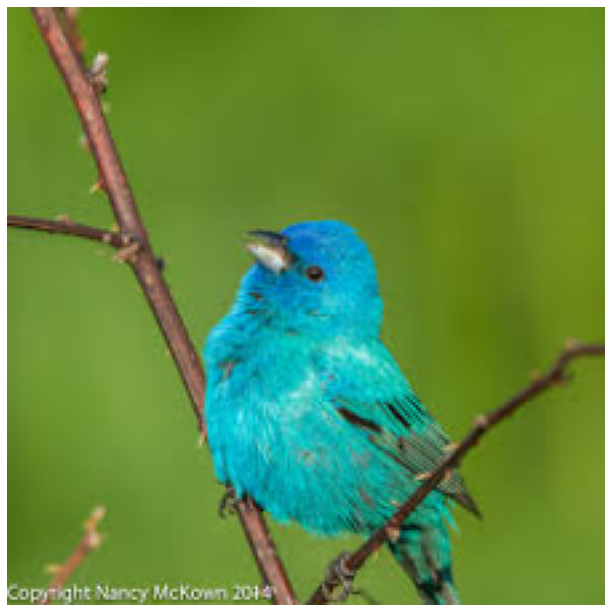

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis("off")
plt.show()

In [10]:
img = np.array(Image.open("images/bird2.jpg").resize((224, 224)))

yhat = vgg.predict(img.reshape(-1, 224, 224, 3))
label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

house_finch (33.61%)


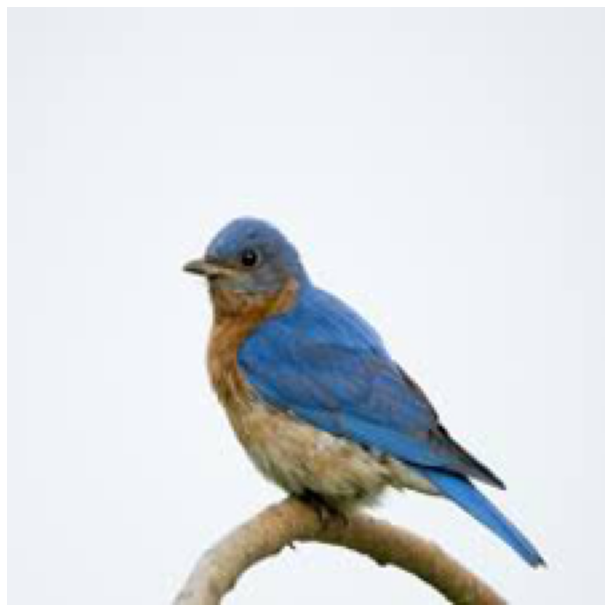

In [11]:
plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis("off")
plt.show()

In [12]:
img = np.array(Image.open("images/bird3.jpg").resize((224, 224)))

yhat = vgg.predict(img.reshape(-1, 224, 224, 3))
label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

quill (37.08%)


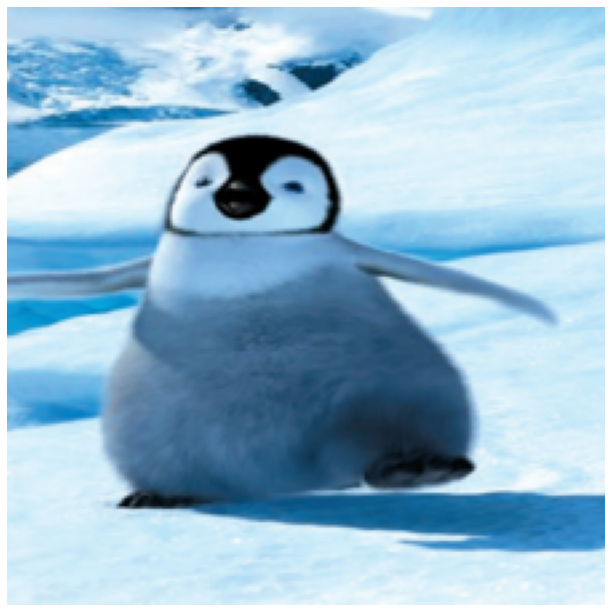

In [13]:
plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis("off")
plt.show()

In [14]:
img = np.array(Image.open("images/bird4.jpg").resize((224, 224)))

yhat = vgg.predict(img.reshape(-1, 224, 224, 3))
label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

king_penguin (100.00%)


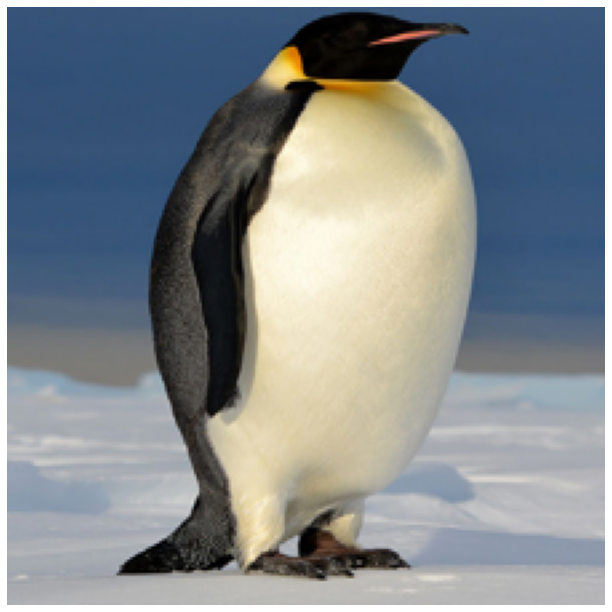

In [15]:
plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis("off")
plt.show()

# GoogLeNet (Inception v3)¶

In [16]:
from tensorflow import keras
from keras.applications.inception_v3 import InceptionV3, decode_predictions

inceptionv3 = InceptionV3(input_shape=(299,299,3))
# inceptionv3.summary()

96116736/96112376 [==============================] - 25s 0us/step


In [23]:
import numpy as np
import cv2
import time 

img = cv2.imread('images/bird5.jpg', -1)
img = cv2.resize(img, (299, 299))

start = time.time() 
yhat = inceptionv3.predict(img.reshape(-1, 299, 299, 3))
time = time.time() - start
# label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]

테스트 시 소요 시간 : 0.07890105247497559
web_site (100.00%)


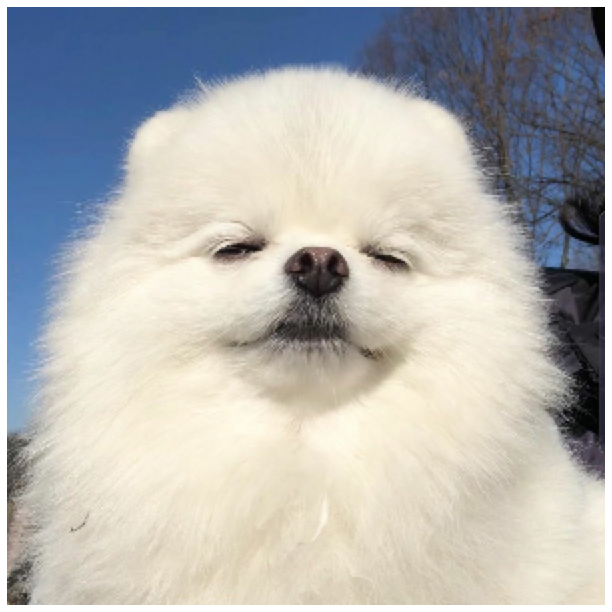

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

print("테스트 시 소요 시간 : {}".format(time))
print('%s (%.2f%%)' % (label[1], label[2]*100))
img = img[:,:,::-1]
plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis("off")
plt.show()

# ResNet

In [25]:
from tensorflow import keras
from keras.applications.resnet50 import ResNet50, decode_predictions
resnet = ResNet50()
resnet.summary()

102858752/102853048 [==============================] - 19s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
_______________________

In [76]:
import cv2
import time 

img = cv2.imread('images/bird23.JPG', -1)
img = cv2.resize(img, (224, 224))

start = time.time() 
yhat = resnet.predict(img.reshape(-1, 224, 224, 3))
time = time.time() - start
label = decode_predictions(yhat)
label = label[0][0]

테스트 시 소요 시간 : 0.07497859001159668
spotlight (19.66%)


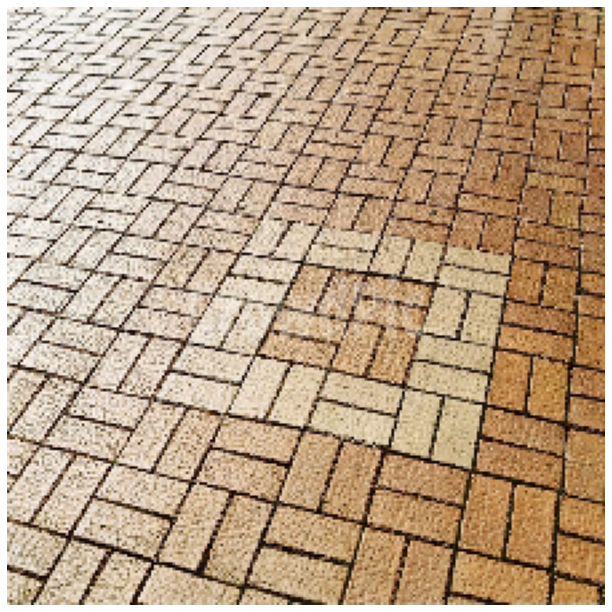

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

print("테스트 시 소요 시간 : {}".format(time))
print('%s (%.2f%%)' % (label[1], label[2]*100))
img = img[:,:,::-1]
plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis("off")
plt.show()